# Data Science and Buisness Analytics Internship

### BY SHREYA BHAT

### Linear Regression Using Python - Prediction using Supervised ML

##### Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

%matplotlib inline 
print('imported successfully')

imported successfully


In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported Successfully")

Data imported Successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###### The above chart and correlation data show that hours and scores are highly correlated considering there are only two variables to be compared.

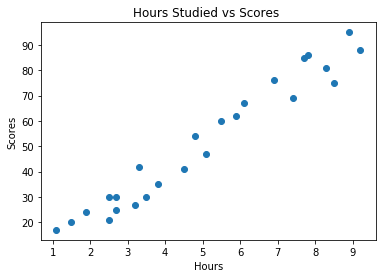

In [9]:
plt.scatter((df['Hours']),df['Scores'])
plt.title('Hours Studied vs Scores ')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##### The above chart depicts the linear relationship between the hours studied and the scores obtained.

#### Building the model

In [52]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df['Scores'])

# using train test split to split the data in train and test data 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=4)

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_pred = regressor.predict(x_test)

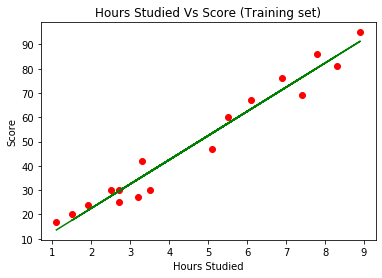

In [54]:
# visualising the training set results
plt.scatter(x_train, y_train,color ='red')
plt.plot(x_train, regressor.predict(x_train),color = 'green')
plt.title('Hours Studied Vs Score (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

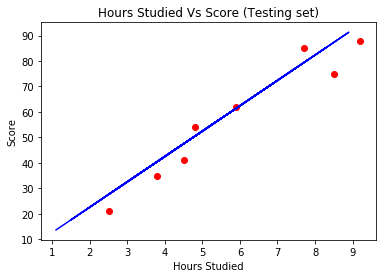

In [55]:
# visualising the test set results
plt.scatter(x_test, y_test,color ='red')
plt.plot(x_train, regressor.predict(x_train),color = 'blue')
plt.title('Hours Studied Vs Score (Testing set)')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

#### Evaluating the Model

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred) 

5.862935275773163

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9151481119722988

In [58]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2

,Actual,Predicted
0,35,40.505500
1,54,50.462493
2,21,27.561409
3,75,87.303367
4,41,47.475395
5,85,79.337773
6,88,94.273263
7,62,61.415185


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [49]:
new_score_pred = regressor.predict([[9.25]])
print('The predicted score of a person studying 9.25 hours is ',new_score_pred)

The predicted score of a person studying 9.25 hours is  [94.77111221]
